In [1]:
'''
Import here useful libraries
Run this cell first for convenience
'''
import numpy as np
from scipy import stats
import scipy
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

# Chapter 5 - Normal Distribution

## Probability Calculation Using the Normal Distribution

### Definition of the Normal Distribution



- Normal Distribution $N( \mu, \sigma)$:
\begin{equation}
    f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi} \sigma } e ^{- \frac{(x - \mu) ^2}{2 \sigma ^2}}
\end{equation}
- $\mu$ is the mean and $\sigma$ the standard deviation of the distribution, hence $\sigma^2$ is its variance
- Symmetric about $\mu$
- Also called the Gaussian distribution

In [4]:
from scipy.stats import norm

# Parameters
x = 1.3 # value to look for
mu = 0 # mean
sigma = 1 # standard deviation

print("Mean: ", norm.mean(loc = mu, scale = sigma))
print("Variance: ", norm.var(loc = mu, scale = sigma)) 
print("Probability mass function: ", norm.pdf(x, loc = mu, scale = sigma))
print("Cumulative distribution function: ", norm.cdf(x, loc = mu, scale = sigma))
print("Survival function (1-cdf): ", norm.sf(x, loc = mu, scale = sigma))


Mean:  0.0
Variance:  1.0
Probability mass function:  0.17136859204780736
Cumulative distribution function:  0.9031995154143897
Survival function (1-cdf):  0.09680048458561036


### Standard Normal Distribution

Chapter- Normal distribution with $\mu = 0$ and $\sigma = 1$
- Probability distribution function:
\begin{equation}
    f(x) = \frac{1}{\sqrt{2 \pi}} e ^{- \frac{x ^2}{2}}
\end{equation}
- Cumulative distribution function: $\Phi(x)$ (special notation for the Gaussian)

### Probability Calculation for General Normal Distributions

- $X \sim N(\mu, \sigma^2) \Longrightarrow Z = \frac{X - \mu}{\sigma} \sim N(0,1)$
- So, $P(a \leq X \leq b) = P \left( \frac{ a - \mu}{ \sigma} \leq \frac{ X - \mu}{ \sigma} \leq \frac{ b - \mu}{ \sigma} \right) = P \left( \frac{ a - \mu}{ \sigma} \leq Z \leq \frac{ b - \mu}{ \sigma} \right) = \Phi \left(\frac{ b - \mu}{ \sigma} \right) - \Phi \left( \frac{a - \mu}{ \sigma} \right)$
- Other properties:
    - $P( \mu -c \sigma \leq X \leq \mu + c \sigma) = P(-c \leq Z \leq c)$
    - $P(X \leq \mu + \sigma z_{\alpha}) = P(Z \leq z_ {\alpha}) = 1 - \alpha$

In [13]:
# This time, we calculate the distribution using the standard normal distribution, by calculating the new variable Z
# Same results as in the previous approach. This method is suggested for manual calculation though
from scipy.stats import norm

# Parameters 
x = 1300 # value to look for
mu = 1320 # mean
sigma = 15 # standard deviation
# Optional
alpha = 0.8 # cdf value used in ppf for calculating the inverse of the probability density function

# Parameter transformation
Z = (x - mu)/sigma


print("Mean: ", mu) # the mean is given 
print("Variance: ", sigma**2) # we calculate the variance using the provided standard deviation
print("Probability mass function: ", norm.pdf(Z))
print("Cumulative distribution function: ", norm.cdf(Z))
print("Survival function (1-cdf): ", norm.sf(Z))
print("Percent point function (inverse of cdf): ", norm.ppf(alpha))
print("Inverse survival function (inverse of (1-cdf)): ", norm.isf(alpha)) # Useful for finding the critical value

Mean:  1320
Variance:  225
Probability mass function:  0.16401007467599366
Cumulative distribution function:  0.09121121972586788
Survival function (1-cdf):  0.9087887802741321
Percent point function (inverse of cdf):  0.8416212335729143
Inverse survival function (inverse of (1-cdf)):  -0.8416212335729143


### Standard Normal Table

- Table to get the values of $X$ given the $\Phi$. We can also calculate X by the following $ppf$ and $isf$
- Given $\Phi(X) = \alpha$:
    - Percentage point function: inverse of the CDF; returns the value of $X$ given that
\begin{equation}
    X = \text{ppf}(\alpha) = \Phi ^{-1} (\alpha)
\end{equation}
    - Inverse survival function: inverse of the survival function (1-CDF); returns the value of $X$ given that
\begin{equation}
    X = \text{isf}(\alpha) = \Phi ^{-1} (1 - \alpha)
\end{equation}
    

In [18]:
alpha = 0.8 # cdf value used in ppf for calculating the inverse of the probability; same as using the standard normal table

from scipy.stats import norm

print("Percent point function (inverse of cdf): ", norm.ppf(alpha))
print("Inverse survival function (inverse of (1-cdf)): ", norm.isf(alpha)) # Useful for finding the critical value

Percent point function (inverse of cdf):  0.8416212335729143
Inverse survival function (inverse of (1-cdf)):  -0.8416212335729143


## Linear Combinations of Normal Random Variables

### Linear Functions of a Normal Random Variable

- $X \sim N(\mu, \sigma^2) $
    - $\Longrightarrow Y = aX +b \sim N(a \mu + b, a^2 \sigma ^2)$ for constant $a,b$ 
- Given $X \sim N(\mu_1, \sigma_1^2)$ and $X \sim N(\mu_2, \sigma_2^2)$ independent 
    - $\Longrightarrow Y = X_1 + X_2 \sim N(\mu_1 + \mu_2, \sigma_1^2 + \sigma_2^2)$ 

### Properties of independent Normal Random Variables

- $ X_i \sim N(\mu_i, \sigma_i^2), 1\leq i \leq n$ are independent and $a_i$, $1 \leq i \leq n$, and $b$ are constants
    - $ Y = a_1X_1 + \cdots + a_n X_n + b \sim N(\mu, \sigma^2)$
    - where $\mu = a_1\mu_1 + \cdots + a_n\mu_n + b, \sigma^2 = a_1^2\sigma_1^2 + \cdots +a_n^2\sigma_n^2$ 
- $X_i \sim N( \mu, \sigma^2)$, $  1\leq i \leq n$ are independent
    - $ \bar{X} \sim N(\mu, \frac{\sigma^2}{n})$ where $\bar{X} = \frac{1}{n} \sum_{i=1}^n X_i$
-If $X_1, \cdots , X_n$ are not independent, then these properties may not be valid anymore


## Approximating Distributions with the Normal Distribution

### The Normal Approximation to the Binomial Distribution

Theorem (approximation of a binomial to a normal distribution):
- If $X$ is a binomial random variable with mean $\mu = np$ and variance $\sigma^2 = npq$, then the limiting form of the distribution of
\begin{equation}
    Z = \frac{X - np}{\sqrt{npq}},
\end{equation}
as $ n \to \infty$ is the standard normal distribution $n(z;0,1)$

### Continuity correction in the Normal approximation

- $X \sim B(n,p)$ and $Z \sim N(0,1)$ then:
    - $P(X \leq x) \approx P \left( Z \leq \frac{x + 0.5 -np}{\sqrt{npq}} \right)$
    - $P(X \geq x) \approx P \left( Z \geq \frac{x - 0.5 -np}{\sqrt{npq}} \right)$

In [10]:
from scipy.stats import norm

# Input
n = 100
p = 0.2
pdf_variable_x = [0, 50] # [star point, end point]
cdf_variable_x = 100

# Calculate the values
mu = n * p
sigma = n * p * (1 - p)
def approximate(x, mu, sigma):
    return (x + 0.5 - mu) / (sigma ** (1/2))
pdf_variable = [approximate(pdf_variable_x[0], mu, sigma), \
                approximate(pdf_variable_x[1], mu, sigma)] # [star point, end point]
cdf_variable = approximate(cdf_variable_x, mu, sigma)

# Calculate
exp, var = norm.stats(loc=mu, scale=sigma, moments='mv')
pdf = norm.cdf(pdf_variable[1], loc=mu, scale=sigma) - norm.cdf(pdf_variable[0], loc=mu, scale=sigma)
cdf = norm.cdf(cdf_variable, loc=mu, scale=sigma)

print("Expectation: ", exp)
print("Variance: ", var)
print("Probability distribution function: ", pdf)
print("Cumulative distribution function: ", cdf)

Expectation:  20.0
Variance:  256.0
Probability distribution function:  0.15962149545986454
Cumulative distribution function:  0.5031167048608426


### The Central Limit Theorem

- Let $X_1, \cdots , X_n$ be _iid_ (independent identically distributed) with a distribution with a mean $\mu$ and a variance $\sigma^2$; then
\begin{equation}
    \bar{X} = \frac{\sum_i^n X_i}{n} \approx N \left( \mu, \frac{\sigma^2}{n} \right)
\end{equation}
for $ n \to \infty$

- The central limit theorem works better if the distribution for the sample is closer to the normal distribution

## Distributions Related to the Normal Distribution

### The Lognormal Distribution

- $Y = lnX) \sim N(\mu, \sigma^2)$
- Probability distribution function:
\begin{equation}
    f(x) = \frac{1}{\sqrt{2\pi} \sigma x} e^{ - \frac{ (ln(x) - \mu)^2}{2 \sigma ^2}} \text{ for } x > 0
\end{equation}

- Cumulative distribution function:
\begin{equation}
    F(x) = \Phi( \frac{ln (x) - \mu}{\sigma})
\end{equation}

- $E(X) = e^{ \mu + \frac{ \sigma ^2}{2}} $
- $ Var(X) = e^{ 2\mu + \sigma^2} ( e^{\sigma^2} -1)$

In [33]:
from scipy.stats import lognorm
from math import exp 

# Parameters
x = 1 # value
mu = 0 # mean
sigma = 1 # standard deviation

scale = exp(mu)

### NOT WORKING
print("Mean: ", lognorm.mean(sigma , loc = mu, scale = scale))
print("Variance: ", lognorm.var(sigma , loc = mu, scale = scale))
print("Probability distribution function: ", lognorm.pdf(x, sigma , loc = mu, scale = scale))
print("Cumulative distribution function: ", lognorm.cdf(x, sigma , loc = mu, scale = scale))
print("Survival function (1-cdf): ", lognorm.sf(x, sigma , loc = mu, scale = scale))

Mean:  1.6487212707001282
Variance:  4.670774270471604
Probability distribution function:  0.3989422804014327
Cumulative distribution function:  0.5
Survival function (1-cdf):  0.5


### Chi-Square Distribution

- $X_i \sim N(0,1)$ and $X = \sum_{i =1}^ v X_i ^2$, and $X_i$ are independent. Then $X \sim \chi_\nu^2$ where $\nu$ is called the degreees of freedom of the distribution
- Probability distribution function:
\begin{equation}
    f(x) = \frac{ \frac{1}{2} e ^ {-x/2} (\frac{x}{2} ) ^ { \frac{\nu}{2} -1} } { \Gamma( \frac {\nu}{2} )}
\end{equation}
\begin{equation}
    \chi_{\nu}^2 = Gam( \frac{ \nu}{2} , \frac{1}{2} )
\end{equation}

- $E(X) = \nu$
- $Var(X) = 2 \nu$

- Critical point: value of $X$ after which the distribution has a CDF equal to $\alpha$ 
\begin{equation}
    P(X \geq \chi_{ \alpha, \nu}^2 ) = \alpha
\end{equation}

In [41]:
from scipy.stats import chi2

# Parameters
nu = 8 # degrees of freedom
x = 5 # variable
alpha = 0.12 # critical value

print("Expectation: ", chi2.mean(nu))
print("Variance: ", chi2.var(nu))
print("Probability distribution function: ", chi2.pdf(x ,nu))
print("Cumulative distribution function: ", chi2.cdf(x, nu))
print("Survival function (1-cdf): ", chi2.sf(x, nu))
print("Percent point function (inverse of cdf): ", chi2.ppf(alpha, nu))
print("Critical value (inverse of (1-cdf)): ", chi2.ppf(1 - alpha, nu))

Expectation:  8.0
Variance:  16.0
Probability distribution function:  0.10688150862486819
Cumulative distribution function:  0.2424238668669339
Survival function (1-cdf):  0.7575761331330662
Percent point function (inverse of cdf):  3.737459881176144
Critical value (inverse of (1-cdf)):  12.77032873743455


### The t-Distribution

- Given $ Z \sim N(0,1)$ and $W \sim \chi_{\nu} ^2$ where $Z$ and $W$ are independent, then
\begin{equation}
    T_{\nu} = \frac{Z} {\sqrt{ W/ \nu }} \sim t_{\nu}
\end{equation} 
is a t-distribution with $\nu$ degrees of freedom

- Since the t-distribution is symmetric, the following holds given the $\alpha$ CDF:
\begin{equation}
    1 - \alpha = P \left( \mid X \mid \leq t_{\frac{ \alpha}{2}, \nu} \right) = P \left( - t_{\frac{ \alpha}{2}, \nu} \leq X \leq t_{\frac{ \alpha}{2}, \nu} \right)
\end{equation}

In [5]:
from scipy.stats import t

# Parameters
nu = 60 # degrees of freedom
x = 0 # variable
alpha = 0.975 # critical value

print("Expectation: ", t.mean(nu))
print("Variance: ", t.var(nu))
print("Probability distribution function: ", t.pdf(x ,nu))
print("Cumulative distribution function: ", t.cdf(x, nu))
print("Survival function (1-cdf): ", t.sf(x, nu))
print("Percent point function (inverse of cdf): ", t.ppf(alpha, nu))
print("Inverse survival function (inverse of (1-cdf)): ", t.isf(alpha, nu)) # Useful for finding the critical value

Expectation:  0.0
Variance:  1.0344827586206897
Probability distribution function:  0.3972835557465738
Cumulative distribution function:  0.5
Survival function (1-cdf):  0.5
Percent point function (inverse of cdf):  -2.660283031150686
Inverse survival function (inverse of (1-cdf)):  2.660283031150686


### The F-Distribution

- $W_i \sim \chi_{\nu_i}^2$ for $ i = 1,2$ and they are independent. Then
\begin{equation}
    \frac{W_1/  \nu_1}{W_2 / \nu_2} \sim F_{\nu_1 , \nu_2}
\end{equation}
is an F-distribution with degrees of freedom $\nu_1, \nu_2$
- $F_{1 - \alpha, \nu_1, \nu_2} = \frac{1}{ F_{\alpha, \nu_1, \nu_2}}$

In [61]:
from scipy.stats import f

# Parameters
nu1 = 29 # degree of freedom 1
nu2 = 18 # degree of freedom 2
x = 1 # variable
alpha = 0.975 # critical value

print("Expectation: ", f.mean(nu1, nu2))
print("Variance: ", f.var(nu1, nu2))
print("Probability distribution function: ", f.pdf(x ,nu1, nu2))
print("Cumulative distribution function: ", f.cdf(x, nu1, nu2))
print("Survival function (1-cdf): ", f.sf(x, nu1, nu2))
print("Percent point function (inverse of cdf): ", f.ppf(alpha, nu1, nu2))
print("Inverse survival function (inverse of (1-cdf)): ", f.isf(alpha, nu1, nu2)) # Useful for finding the critical value

Expectation:  1.125
Variance:  0.2805572660098522
Probability distribution function:  0.9294075640447474
Cumulative distribution function:  0.48671282505106833
Survival function (1-cdf):  0.5132871749489316
Percent point function (inverse of cdf):  2.452651390584542
Inverse survival function (inverse of (1-cdf)):  0.4442032125917732


### Multivariate Normal Distribution

- Bivariate normal distribution for $(X,Y)$ with parameters $\mu_1 , \mu_2 , \sigma_1^2 , \sigma_2^2 , \rho$, where $\mu_1 = E(X)$
- Variables are: $\mu_1 = E(X), \mu_2 = E(Y) , \sigma_1^2 = Var(X)  , \sigma_2^2 = Var(Y) , \rho = Corr(X,Y)$
- Joint probability distribution function of $(X,Y)$:
\begin{equation}
    f(x,y) = \frac{1}{2 \pi \sigma_1 \sigma_2 \sqrt{ 1- \rho ^2} } e^ { \left( - \frac{1}{2 (1 - \rho^2)} \left[ x^2 + y^2 -2 \rho xy \right] \right) } \text{ for } x< \infty, y < \infty
\end{equation}

- In particular, when $\mu_1 = \mu_2 = 0 $ and $\sigma_1 = \sigma_2 = 1$
\begin{equation}
    f(x,y) = \frac{1}{2 \pi \sqrt{1 - \rho^2}} e^ { \left( - \frac{1}{2 (1 - \rho^2)} \left[ x^2 + y^2 -2 \rho x y \right] \right) }
\end{equation}
- When $\mu_1 = \mu_2 = 0 $ and $\sigma_1 = \sigma_2 = 1$ and also there is independence between $X$ and $Y$, so $\rho = 0$
\begin{equation}
    f(x,y) = \frac{1}{2 \pi} e^ { \left( - \frac{1}{2} \left[ x^2 + y^2 \right] \right) }
\end{equation}

In [140]:
from scipy.stats import multivariate_normal

mu = ([0, 0]) # means
cov = [[1, 0], [0, 1]] # covariance matrix
x = 0 # value

print("Probability distribution function: ", multivariate_normal.pdf(x, mean = mu, cov = cov ))
# 怎么办？
#print("Cumulative distribution function: ", multivariate_normal.cdf(x, mean = mu, cov = cov, maxpts=1000000*len(mu), abseps=1e-5, releps=1e-5))

Probability distribution function:  0.15915494309189535


MovieWriter imagemagick unavailable; using Pillow instead.


3
bla


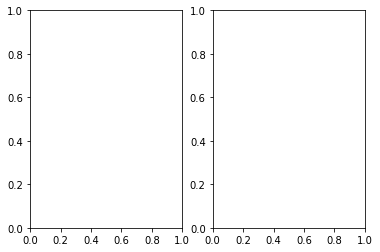

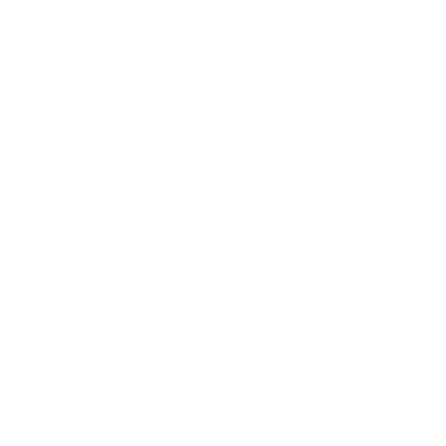

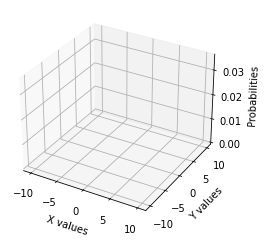

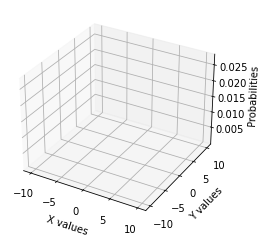

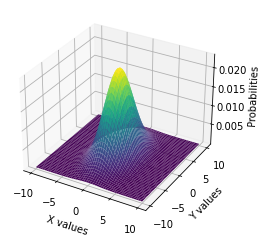

In [41]:
# Complete the GIF creator!!

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(1,2)
import imageio

width = 600
height= 600
import matplotlib.animation as anim

#Parameters to set
mu_x = 0
variance_x = 3

mu_y = 0
variance_y = 15

fps = 1
#Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
 
class AnimatedGif:
    def __init__(self, size=(3*width, 3*height)):
        self.fig = plt.figure()
        self.fig.set_size_inches(size[0] / 100, size[1] / 100)
        ax = self.fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
        ax.set_xticks([])
        ax.set_yticks([])
        self.images = []
 
    def add(self, image):
        plt_im = plt.imshow(image, cmap='viridis', vmin=0, vmax=1, animated=True)
        #plt_txt = plt.text(20, 20, label, color='red')
        self.images.append([image])
 
    def save(self, filename):
        animation = anim.ArtistAnimation(self.fig, self.images)
        animation.save(filename, writer='imagemagick', fps=fps)

animated_gif = AnimatedGif(size=(width,height))
images = []
import matplotlib.animation as animation
figures = []

filename = "/home/fedebotu/Desktop/multivar.gif"
for i in range(3):
    mu_x = 0 
    variance_x = 2+ i
    mu_y = 0
    variance_y = 10+ i
    rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])
    #Make a 3D plot
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_xlabel('X values')
    ax.set_ylabel('Y values')
    ax.set_zlabel('Probabilities')
    #ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
    im = ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
    images.append([im])
    #animation.save(filename, writer='imagemagick', fps=1)

    # plt.imshow(ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0))
    # animated_gif.add(images[i])
print(len(images))
#fig  =  plt.figure(
print('bla')
animation = anim.ArtistAnimation(fig, images)
animation.save(filename, writer='imagemagick', fps=10)
